# Kostya's stuff

In [3]:
%pylab inline
%run ../utils.py
%run ../3DVariables/Functions.py

Populating the interactive namespace from numpy and matplotlib
import failed


In [271]:
data = get_data()

NameError: name 'get_data' is not defined

In [272]:
from matplotlib.colors import LogNorm
import seaborn as s
s.set(rc={'image.cmap': "jet"})
config_plots(rcParams)

ImportError: No module named seaborn

In [273]:
sel = lambda s: [ c for c in data.columns 
    if c.startswith(s) and c[-1] not in ["0","8"] ]

etrack = data[sel("EDepLayer")].mean(axis=1)
scatter(data['BetaTOF'], etrack, c='k', s=1, marker='.', lw=0)
plot(Beta_cent,ETrack,'b')
plot(Beta_cent,ETrack+sigmaEtrackinv*(ETrack**2),'r')
plot(Beta_cent,ETrack-sigmaEtrackinv*(ETrack**2),'r')
xlim(0.4,1.0); ylim(0,1)
xlabel("Beta TOF"); ylabel("mean EdepLayer in inner")

NameError: name 'data' is not defined

In [5]:
sel = lambda s: [ c for c in data.columns if c.startswith(s) ]

scatter(data['BetaTOF'], data[sel('EdepTOF')].mean(axis=1), c='k', s=1, marker='.', lw=0)
plot(Beta_cent,ETOF,'b')
plot(Beta_cent,ETOF+sigmaEtofinv*(ETOF**2),'r')
plot(Beta_cent,ETOF-sigmaEtofinv*(ETOF**2),'r')
xlim(0.4,1.0); ylim(0,10)
xlabel("Beta TOF"); ylabel("mean EdepTOF")

NameError: name 'data' is not defined

In [6]:
scatter(data['BetaTOF'], data['EdepTRD']/data['NTRDclusters'], c='k', s=1, marker='.', lw=0)
plot(Beta_cent,ETRD,'b')
plot(Beta_cent,ETRD+sigmaETRDinv*(ETRD**2),'r')
plot(Beta_cent,ETRD-sigmaETRDinv*(ETRD**2),'r')
xlim(0.4,1.0); ylim(0,10)
xlabel("Beta TOF"); ylabel("EdepTRD/NTRDclusters")

NameError: name 'data' is not defined

In [7]:
scatter(data['R'],data['BetaTOF'], c='k', s=1, marker='.', lw=0)
Rs = valorecent
Bs = Rs/np.sqrt(1.875**2+Rs**2)
plot(Rs,Bs,'b')
plot(Rs + sigmaRinv*(Rs**2),Bs,'r')
plot(Rs - sigmaRinv*(Rs**2),Bs,'r')
xlim(0,10); ylim(0.4,1)

NameError: name 'data' is not defined

In [8]:
scatter(data['R'],data['BetaTOF'], c='k', s=1, marker='.', lw=0)
Bs = betacent 
Rs = 1.875*Bs/np.sqrt(1-Bs**2)
plot(Rs,Bs,'b')
plot(Rs,Bs + sigmabetainv*(Bs**2),'r')
plot(Rs,Bs - sigmabetainv*(Bs**2),'r')
xlim(0,10); ylim(0.4,1)

NameError: name 'data' is not defined

In [9]:
Beta_cent

NameError: name 'Beta_cent' is not defined

# Benoît's stuff

## Comparison between observed target matrix and the MCMC predicted matrix

The following plot is the target matrix obtained with real data.
The cut used are:
[
    "physicsTrigger",
    "chargeOne",
    "oneTrack",
    "goldenTOF",
    "goldenTRACKER",
    "oneParticle",
    "goldenTRD",
    "betaNotCrazy"]

x axis is rigidity measured and y axis is beta measured


<img src="files/protonObserved.png">

The following plot is the MCMC predicted matrix taking into account only protons (ie. the deuton flux is set to 0). Is is obtained by taking the proton parameters where the MCMC has converged and build the expected beta Vs rig distribution with them. **It is based on AMS.protonsB800**

<img src="files/protonPredicted.png">

Let's look at the difference between the predicted distribution and the observed one.
The following plog is : (predicted - observed)/observed

<img src="files/protonPredictedMinusObserved.png">

The enveloppes added to the plot represents the observed distribution
We are not interested by the red blob which is a region that will be masked. We are only interested by the region where the enveloppes are.

What we can see is **there is an excess of proton in the peak of the distribution and there is a lack of proton in the tail. This can be explained by the fact that the sigma of beta TOF in the Monte-Carlo is too small.**

(incidently we can also see the blue region where the deutons are missing. It is normal since no deutons where injected in the MCMC)

## investigating sigma

The following plot shows the mean value of beta TOF as a function of the measured rigidity for data and MC. It is obtained by vertically slicing the aforementioned hObserved and hPredicted distributions and fitting every slice by a gaussian. The mean of every gaussian is the y-value of every point.
<img src="files/betaTOFMeanVsRig.png">
The agreement between both graphs is good.

However this is not the case for the sigma distribution.
<img src="files/betaTOFSigmaVsRig.png">

# onclusion

**At least in protonsB800 the beta TOF sigma is wrong by ~12%**

In [2]:
import numpy as np
from pandas import DataFrame
import pandas as pd
import glob

%pylab inline

import os


Populating the interactive namespace from numpy and matplotlib


In [4]:
def loadBinary(dirname):
    print 'loading : ' + dirname
    data=dict()
    for file in os.listdir(dirname):
        if file.startswith(('time_L','R_','betaH_','beta_','NTofClusterH_','GenDir','GenCoo')):
            data[file.split('_chunk')[0]] = np.fromfile(dirname+'/'+file, np.dtype('float32'))

    return DataFrame(data)

def makeDataframe(files, name):
    df = pd.concat(map(loadBinary, files[:50]))
    df = df[(df.time_L0 > -999) & (df.time_L1 > -999) & (df.time_L2 > -999) & (df.time_L3 > -999) & (df.R < 30) & (df.R > 1) & (df.betaH > 0.5) & (df.betaH < 1.2) & (df.NTofClusterH == 4)]
    df['binRgdt'] = df['R'].astype('int')
    df.index.name = name
    return df

dfMC = makeDataframe( glob.glob('/afs/cern.ch/user/b/bcoste/myeos/dstTofTiming/protons.B1034_pr.pl1.1200.qgsp_bic_ams/*.00000001.output'), "MC" )
dfData = makeDataframe( glob.glob('/afs/cern.ch/user/b/bcoste/myeos/dstTofTiming/ISS.B950_pass6/*.00000001.output'), "Data" )


    

loading : /afs/cern.ch/user/b/bcoste/myeos/dstTofTiming/protons.B1034_pr.pl1.1200.qgsp_bic_ams/1946159363.00000001.output
loading : /afs/cern.ch/user/b/bcoste/myeos/dstTofTiming/protons.B1034_pr.pl1.1200.qgsp_bic_ams/1946159364.00000001.output
loading : /afs/cern.ch/user/b/bcoste/myeos/dstTofTiming/protons.B1034_pr.pl1.1200.qgsp_bic_ams/872731547.00000001.output
loading : /afs/cern.ch/user/b/bcoste/myeos/dstTofTiming/protons.B1034_pr.pl1.1200.qgsp_bic_ams/872731548.00000001.output
loading : /afs/cern.ch/user/b/bcoste/myeos/dstTofTiming/protons.B1034_pr.pl1.1200.qgsp_bic_ams/872731549.00000001.output
loading : /afs/cern.ch/user/b/bcoste/myeos/dstTofTiming/protons.B1034_pr.pl1.1200.qgsp_bic_ams/872731550.00000001.output
loading : /afs/cern.ch/user/b/bcoste/myeos/dstTofTiming/protons.B1034_pr.pl1.1200.qgsp_bic_ams/872731551.00000001.output
loading : /afs/cern.ch/user/b/bcoste/myeos/dstTofTiming/protons.B1034_pr.pl1.1200.qgsp_bic_ams/872731552.00000001.output
loading : /afs/cern.ch/user/b/

Data
MC


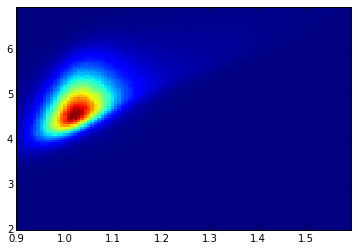

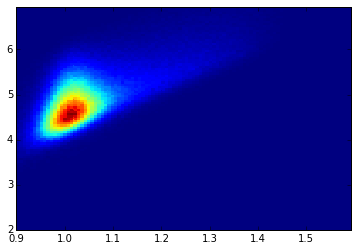

In [5]:
import sys
sys.path.insert(0,'../../../../utils/python')

import bigQueryPlotting as bq
import math

def binning(df,var,nBins,firstBin,lastBin):
    binWidth=(lastBin-firstBin)/nBins
    return firstBin + binWidth * (df[var]-firstBin).floordiv(binWidth)

def plotDataFrame2D(df,nBinsX,firstBinX,lastBinX,nBinsY,firstBinY,lastBinY,varX,varY):
    binX='bin_'+varX
    binY='bin_'+varY
    dfTmp=pd.DataFrame(df[[varX,varY]])
    dfTmp[binX]=binning(dfTmp,varX,nBinsX,firstBinX,lastBinX)
    dfTmp[binY]=binning(dfTmp,varY,nBinsY,firstBinY,lastBinY)
    dfTmp=dfTmp[(dfTmp[binX] >= firstBinX) & (dfTmp[binX] < lastBinX) & (dfTmp[binY] >= firstBinY) & (dfTmp[binY] < lastBinY) ]
    plot_matrix( dfTmp.groupby([binY,binX]).count()[varX].unstack().fillna(0) )

for df in [dfData,dfMC]:
    print df.index.name
    df['invBetaH']=1/df.betaH
    df['time_L3-time_L0']=df['time_L3']-df['time_L0']
    df['time_L1-time_L0']=df['time_L1']-df['time_L0']
    df['time_L3-time_L1']=df['time_L3']-df['time_L1']
    df['time_L3-time_L2']=df['time_L3']-df['time_L2']
    figure()
    plotDataFrame2D(df,100,0.9,1.6,100,2,7.,'invBetaH','time_L3-time_L1')




Beta distribution of MC and data is similar when integrated over the rigidity

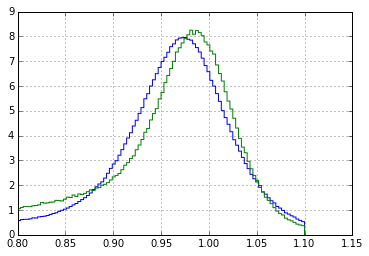

In [6]:
for df in [dfData,dfMC]:
    df['betaH'].hist(normed=True,range=(0.8,1.1),bins=100,histtype='step')

However if we look per rigidity slice, this is not the case:

In [7]:
def makeHistAndFit(data,init,hist_range,ylimit,funcFit=None,**kwargs):
    if funcFit is None: funcFit=gaussian
    if len(data):
        n, bins, patches = plt.hist(data,normed=True,range=hist_range,bins=100,histtype='step',linewidth=2.0,**kwargs)
        ylim(ylimit)
        xdata, ydata = ((bins[:-1] + bins[1:])*0.5,n)
        out = fit(funcFit,xdata,ydata,init)
        if len(out[0]) > 2:
            x,y = zip(*filter(lambda x: -out[0][2] < x[0]-out[0][1] < out[0][2],zip(xdata,ydata)))
            out = fit(funcFit,x,y,out[0])
            plt.plot(x,funcFit(out[0],x),linewidth=2.0)
        else : plt.plot(xdata,funcFit(out[0],xdata),linewidth=2.0)
        return out[0]
    return (-1,-1)

def fitAllRigBin(data,var,rigBins,init,hist_range,ylimit,**kwargs):
    par = []
    for i in range(len(rigBins[:-1])):
        name=var + 'distribution - rigidity : ['+str(rigBins[i])+','+str(rigBins[i+1])+']'
        figure(name)
        title(name)
        par.append( makeHistAndFit( df[(df['R']>=rigBins[i]) & (df['R']<rigBins[i+1])][var].values, init, hist_range,ylimit,**kwargs) )
    return par




### betaH distributions

[  2.           3.42105263   4.84210526   6.26315789   7.68421053
   9.10526316  10.52631579  11.94736842  13.36842105  14.78947368
  16.21052632  17.63157895  19.05263158  20.47368421  21.89473684
  23.31578947  24.73684211  26.15789474  27.57894737  29.        ]


/afs/cern.ch/user/b/bcoste/.virtualenvs/python-2.7-sql/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


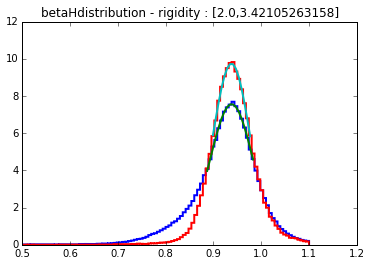

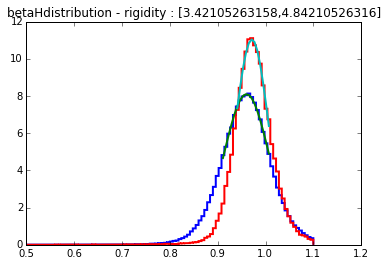

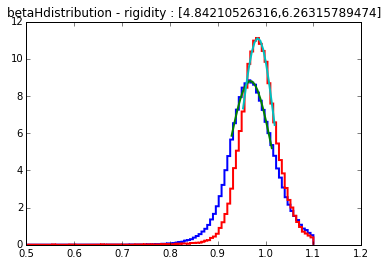

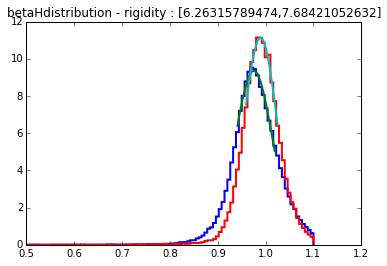

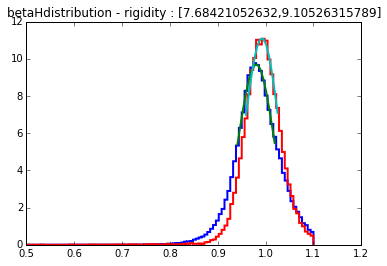

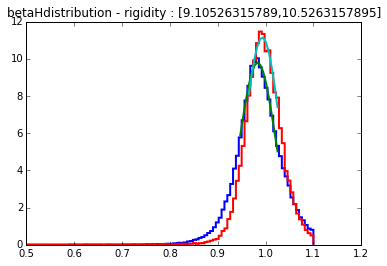

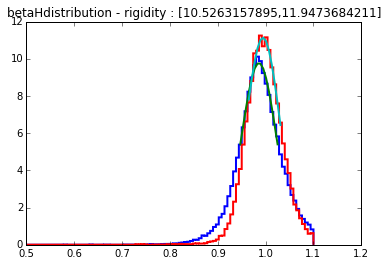

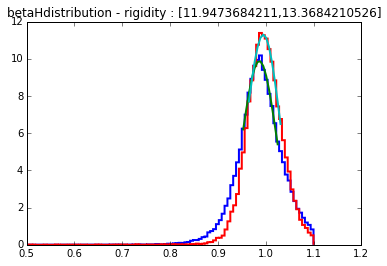

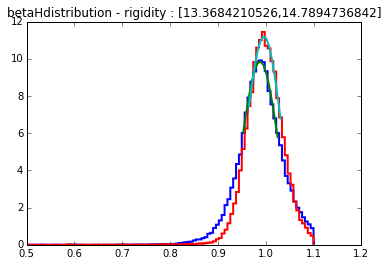

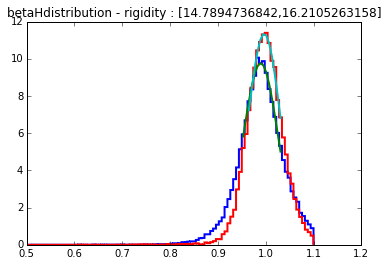

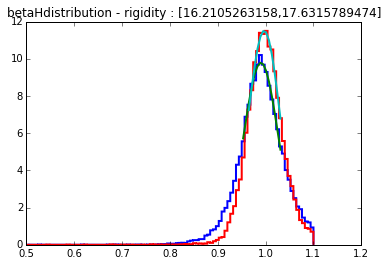

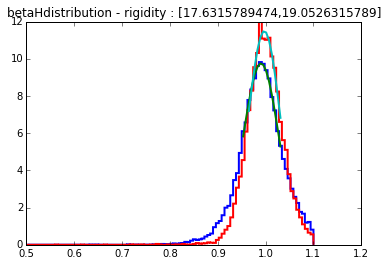

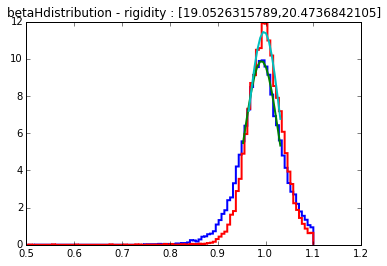

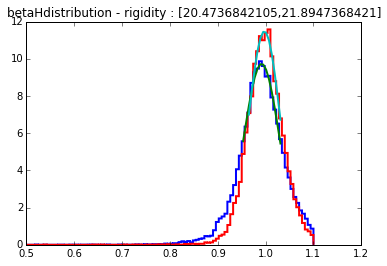

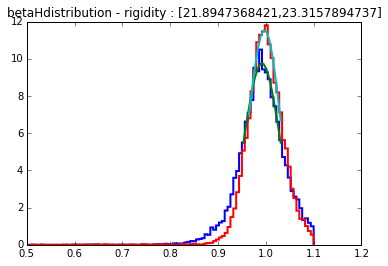

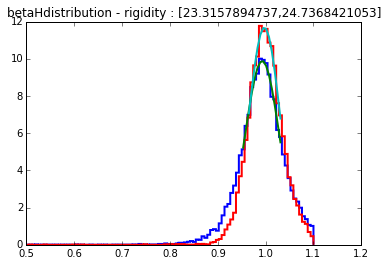

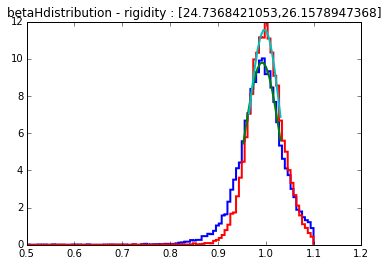

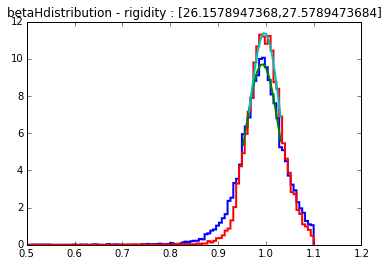

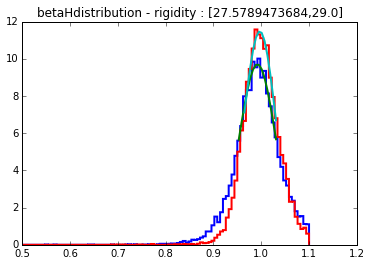

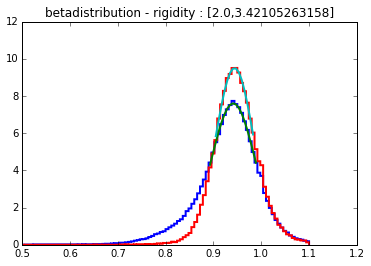

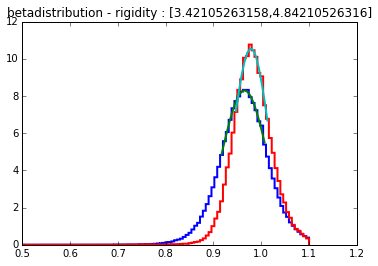

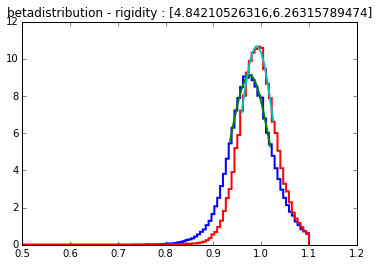

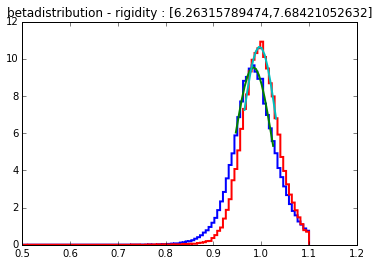

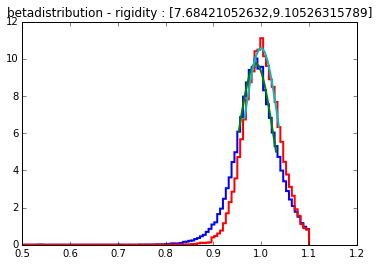

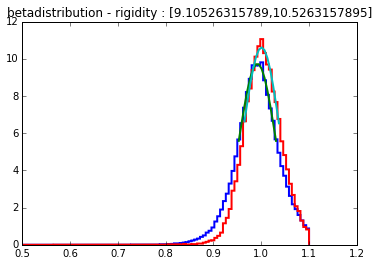

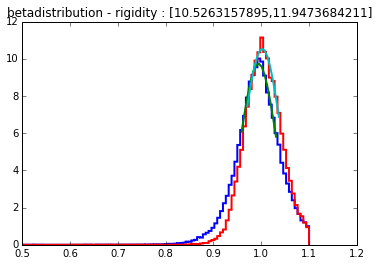

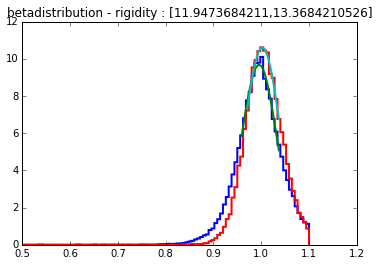

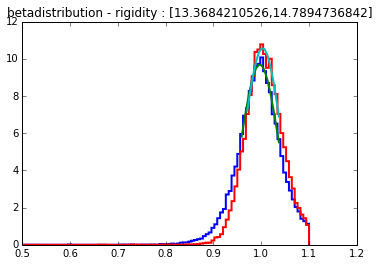

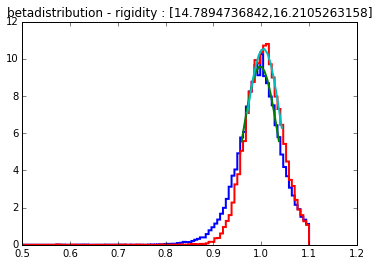

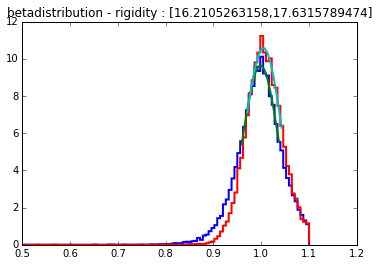

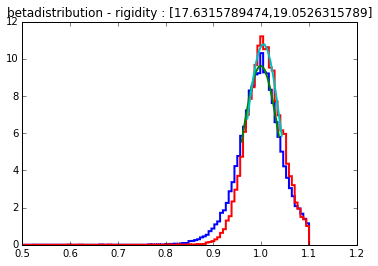

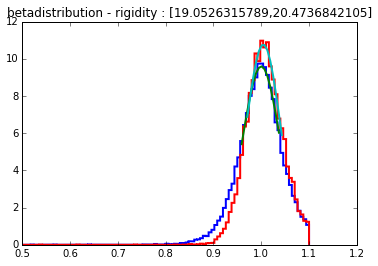

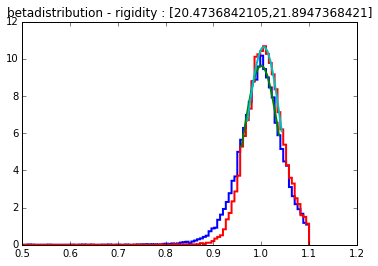

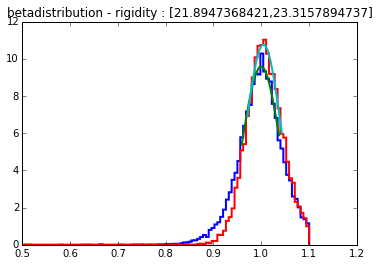

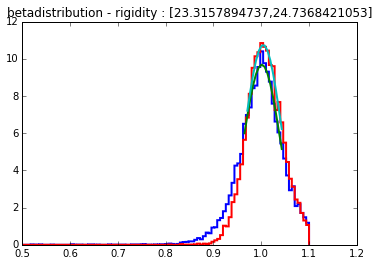

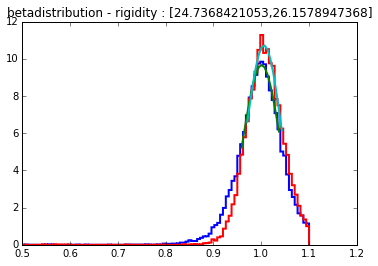

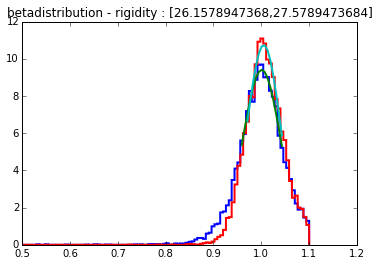

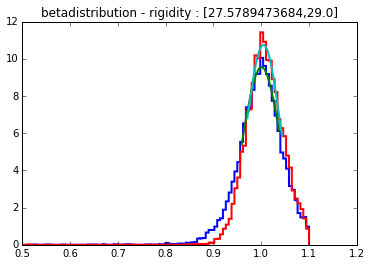

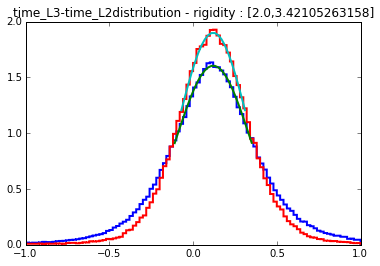

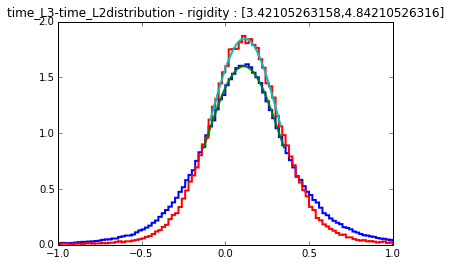

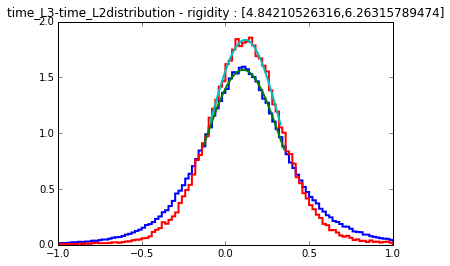

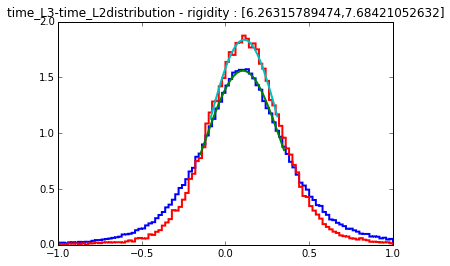

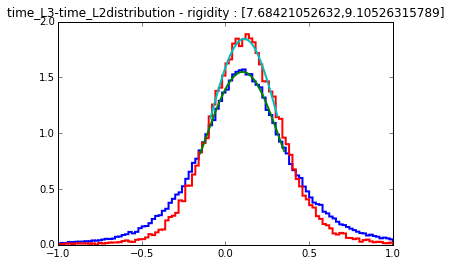

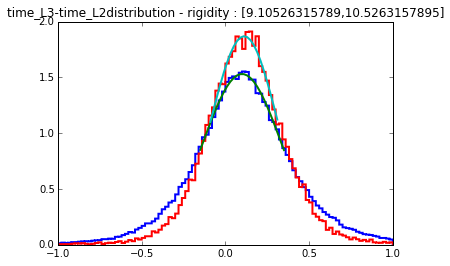

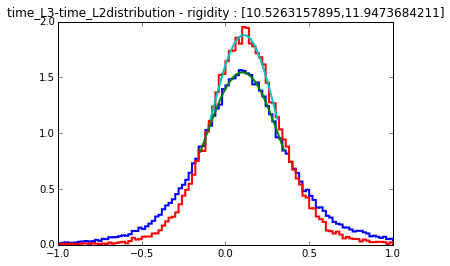

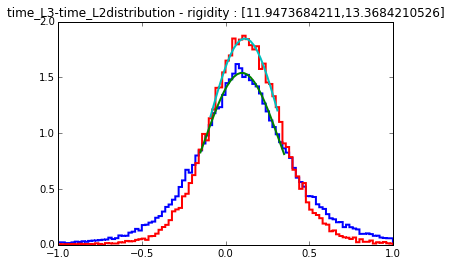

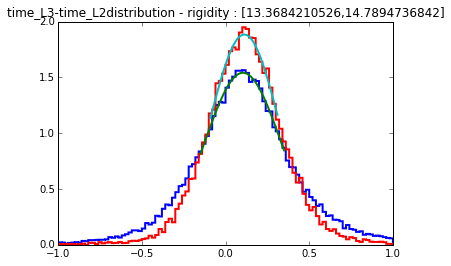

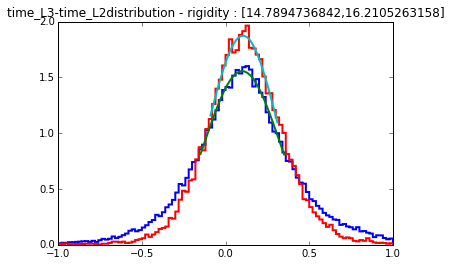

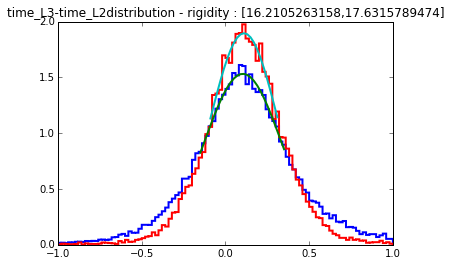

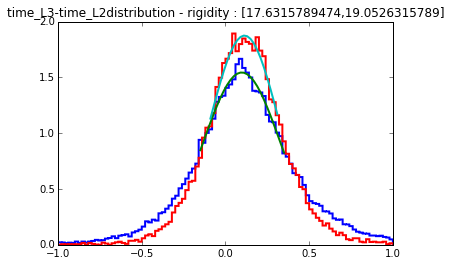

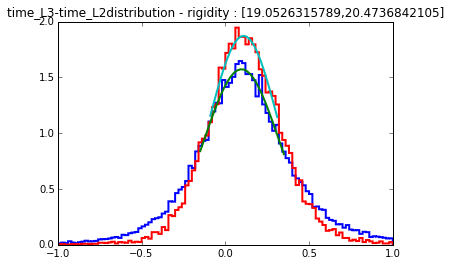

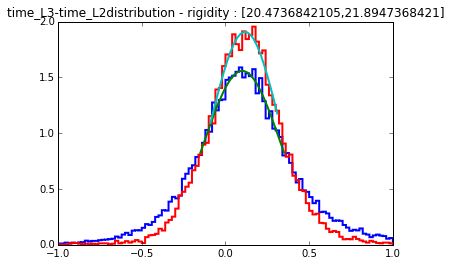

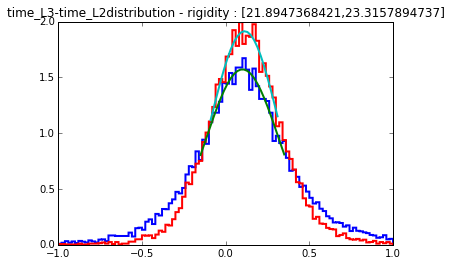

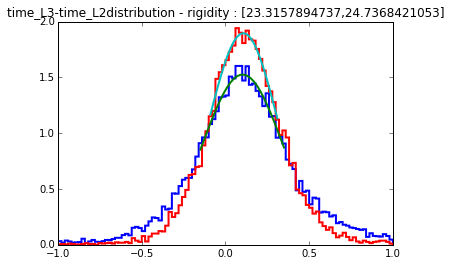

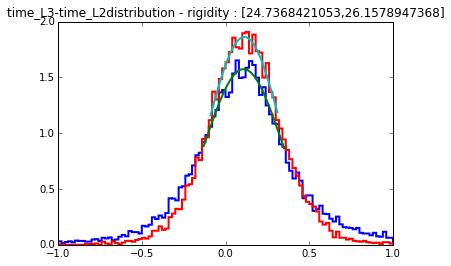

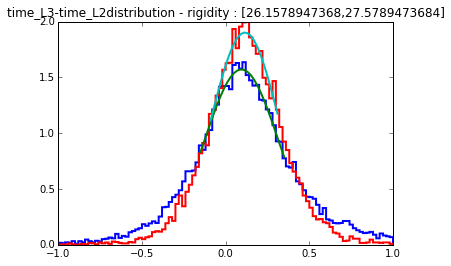

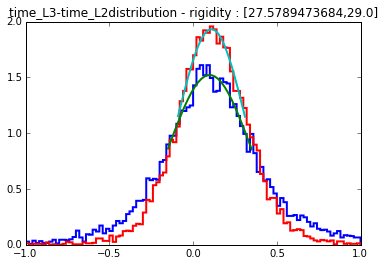

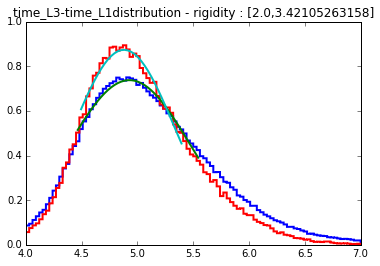

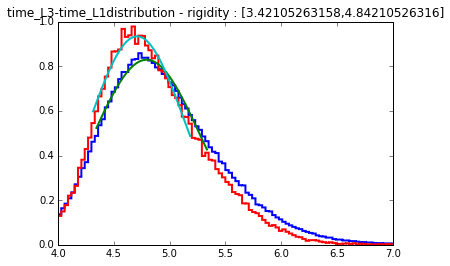

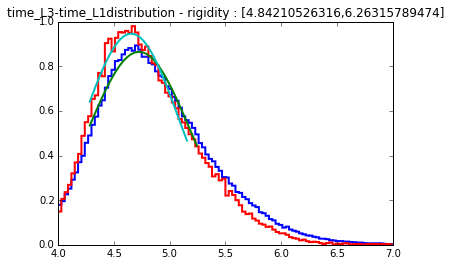

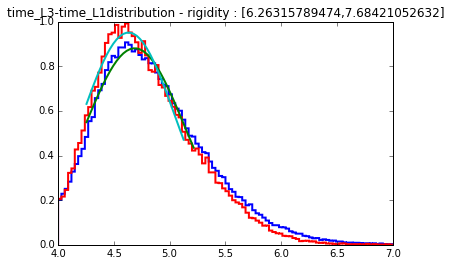

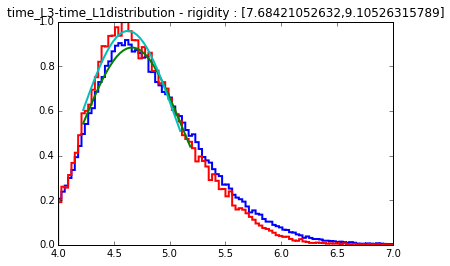

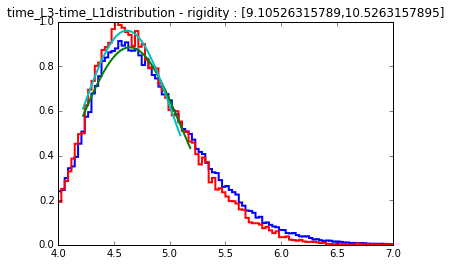

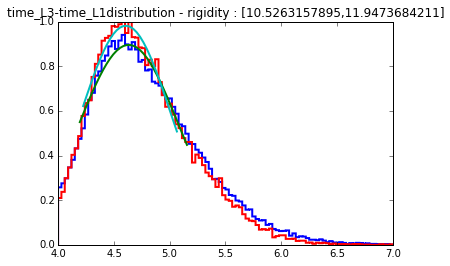

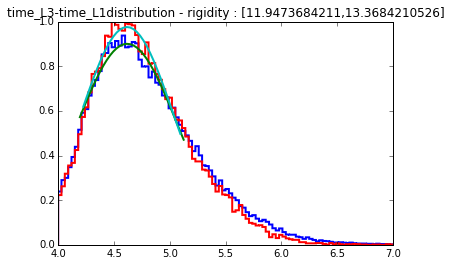

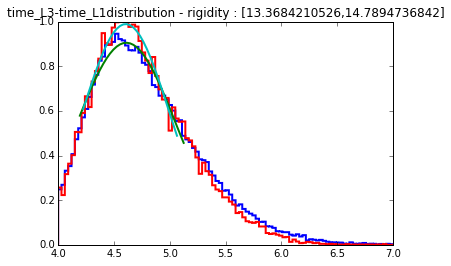

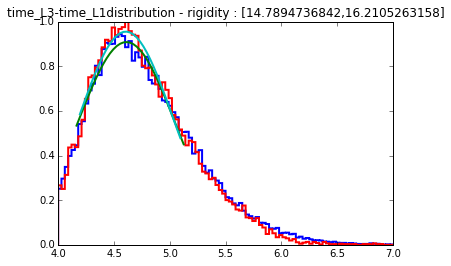

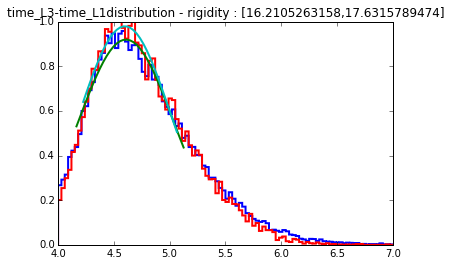

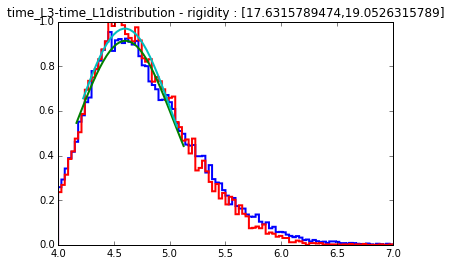

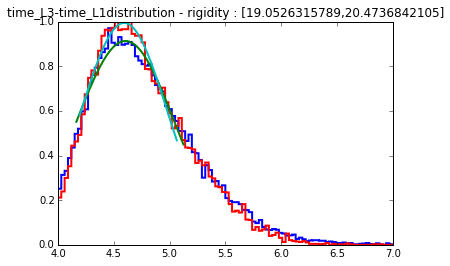

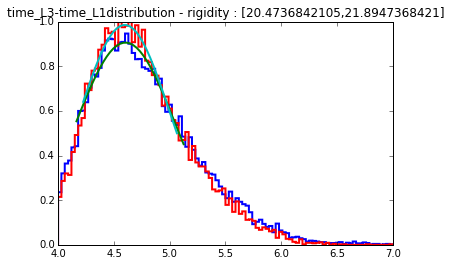

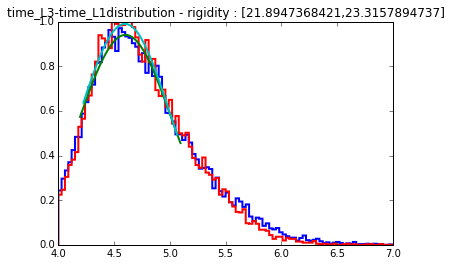

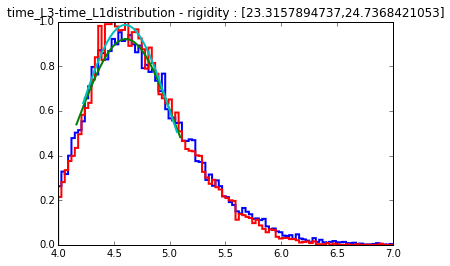

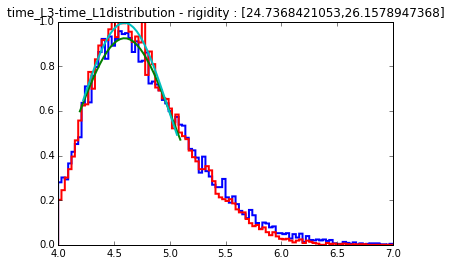

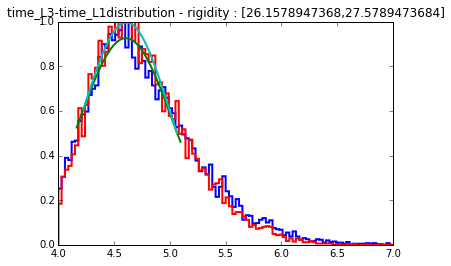

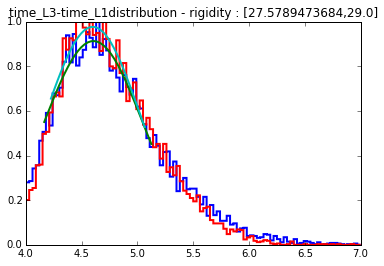

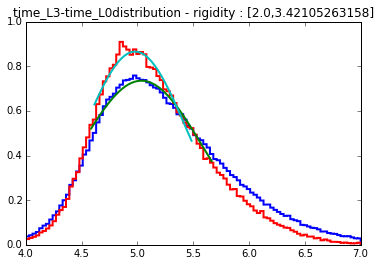

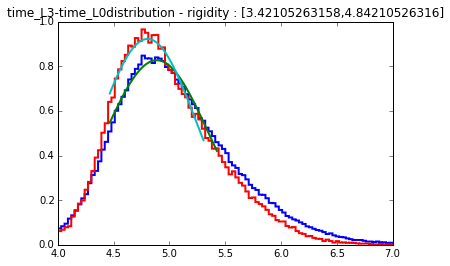

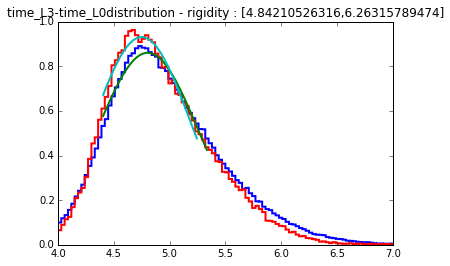

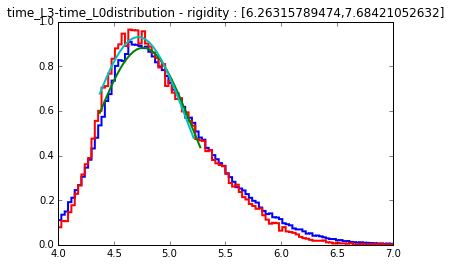

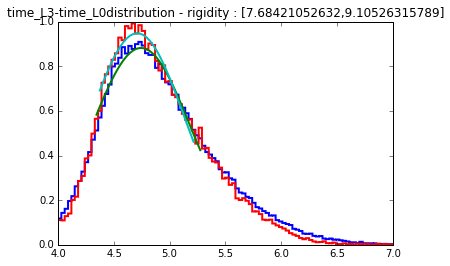

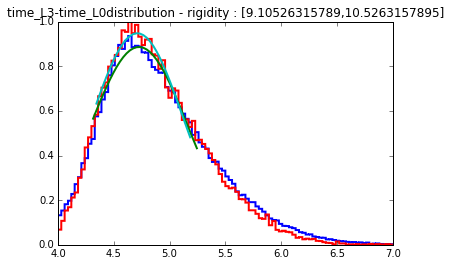

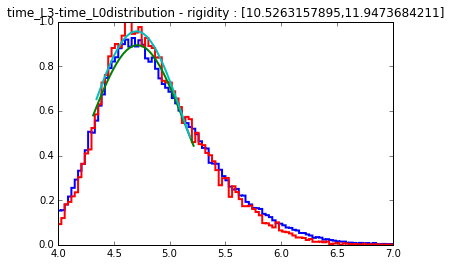

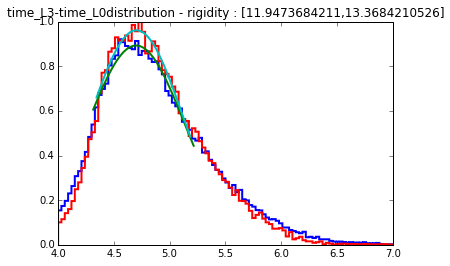

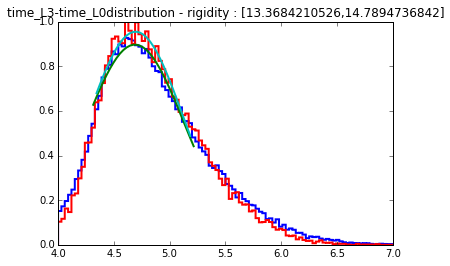

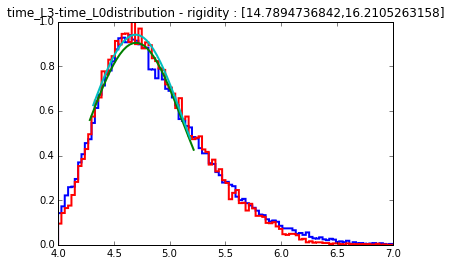

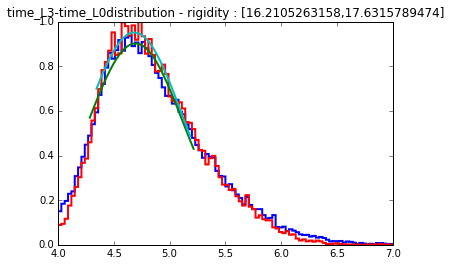

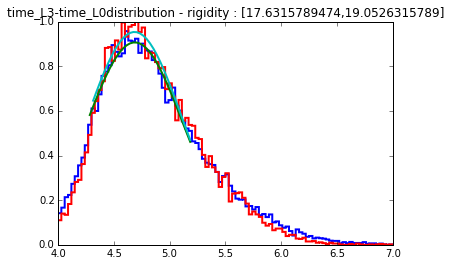

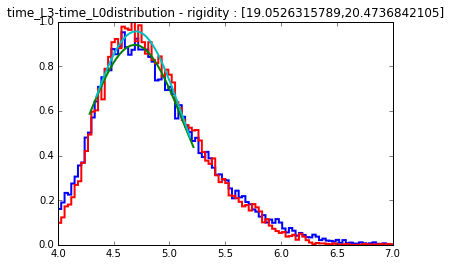

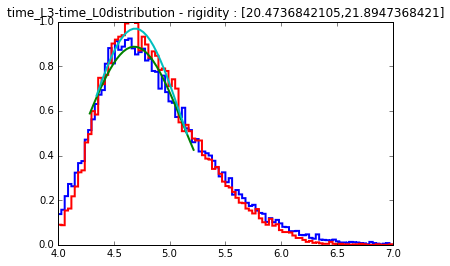

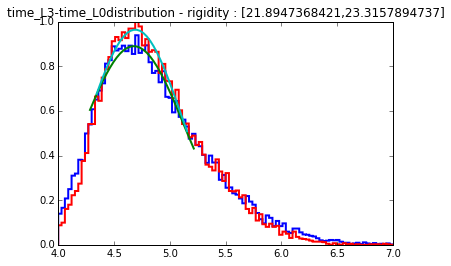

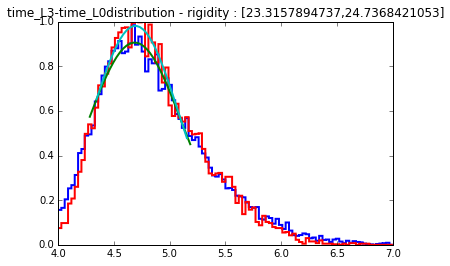

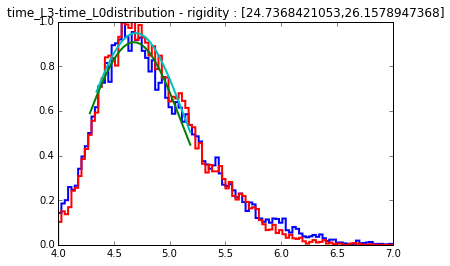

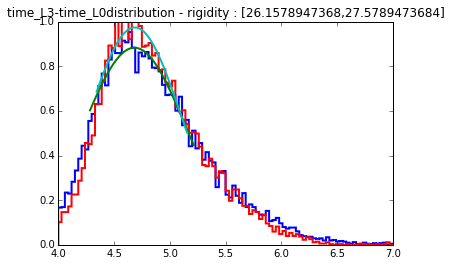

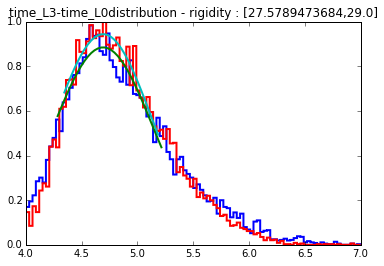

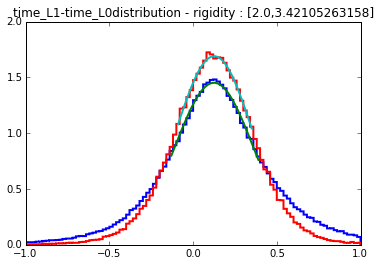

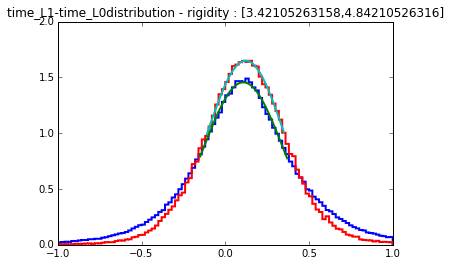

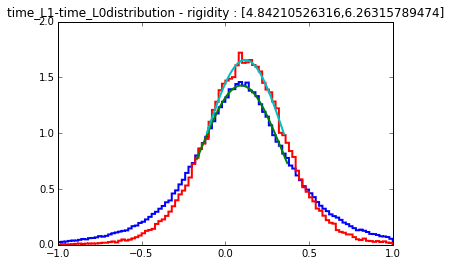

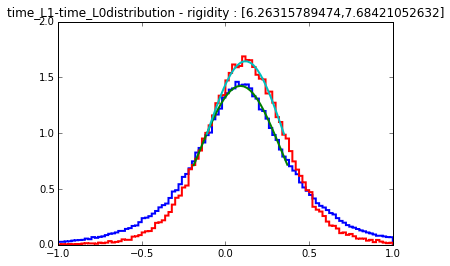

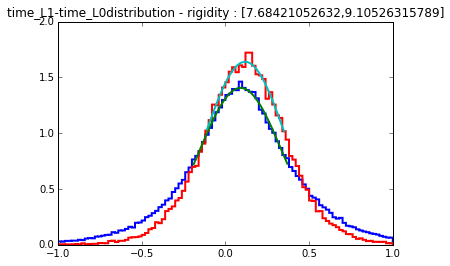

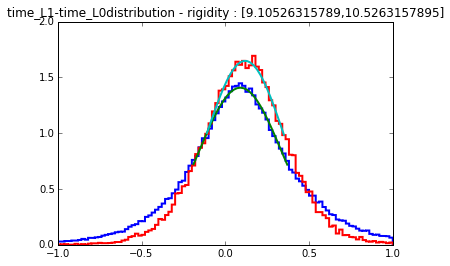

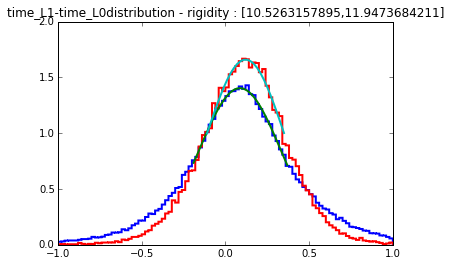

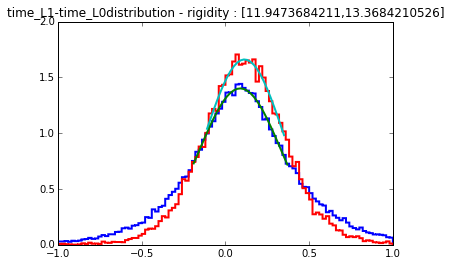

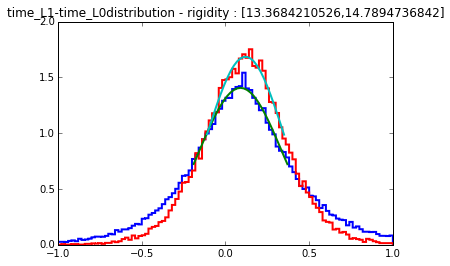

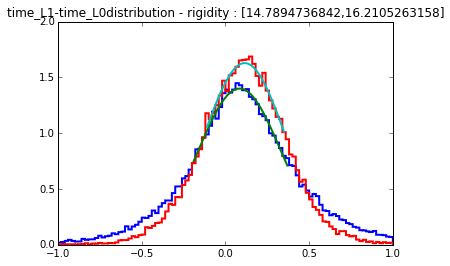

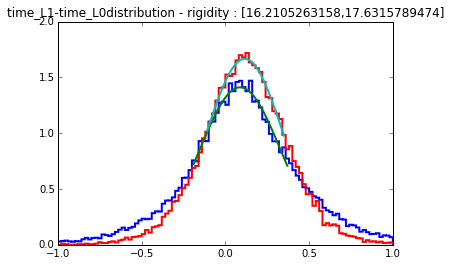

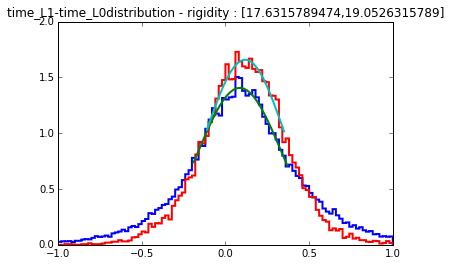

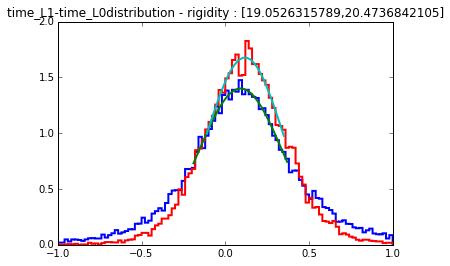

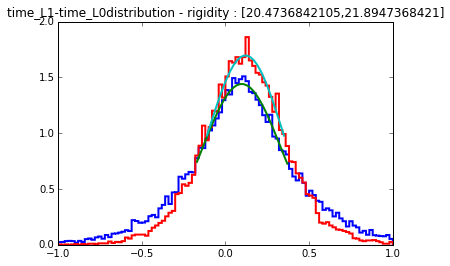

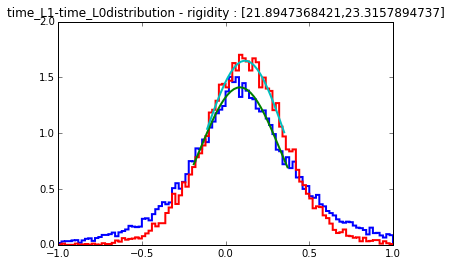

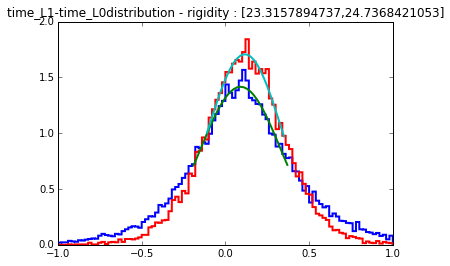

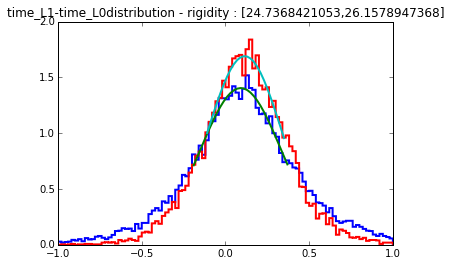

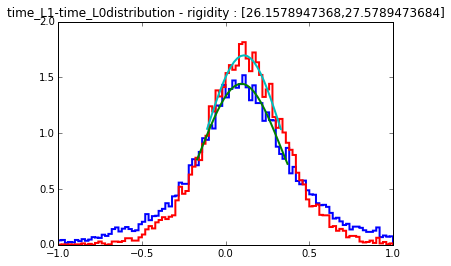

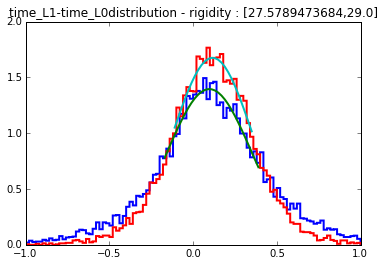

In [8]:
mean = dict()
std = dict()

variables={}
rigBins=np.linspace(2,29,20)
print rigBins

variables['betaH']=([9.0, 0.95, 0.2], (0.5, 1.1), (0,12))
variables['beta'] =([9.0, 0.95, 0.2], (0.5, 1.1), (0,12))
variables['time_L3-time_L0']=([1.0, 6.0, 1.0], (4,7),(0,1))
variables['time_L3-time_L1']=([1.0, 6.0, 1.0], (4,7),(0,1))
variables['time_L3-time_L2']=([1.0, 0, 0.5], (-1,1),(0,2))
variables['time_L1-time_L0']=([1.0, 0, 0.5], (-1,1),(0,2))


for var in variables:
    mean[var]=dict()
    std[var]=dict()

for df in [dfData,dfMC]:
    for var in variables:
        scale,mean[var][df.index.name],std[var][df.index.name]=zip(* fitAllRigBin(df,var,rigBins,*variables[var]) )    

betaH
beta
time_L3-time_L2
time_L3-time_L1
time_L3-time_L0
time_L1-time_L0


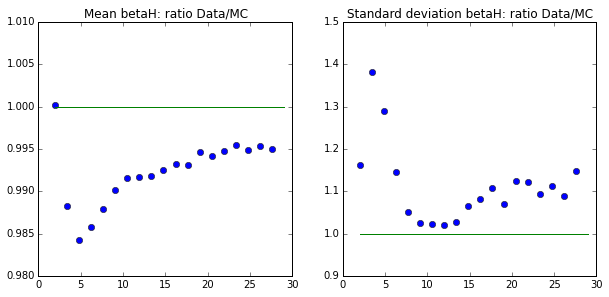

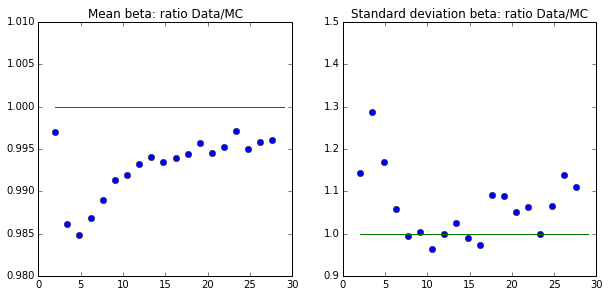

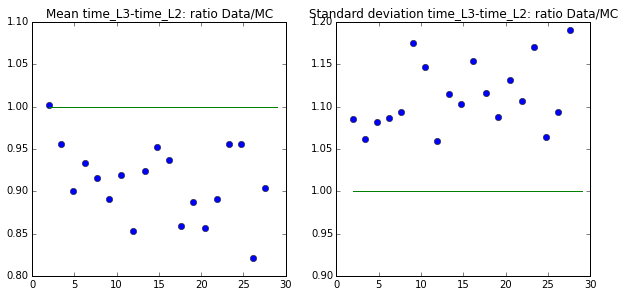

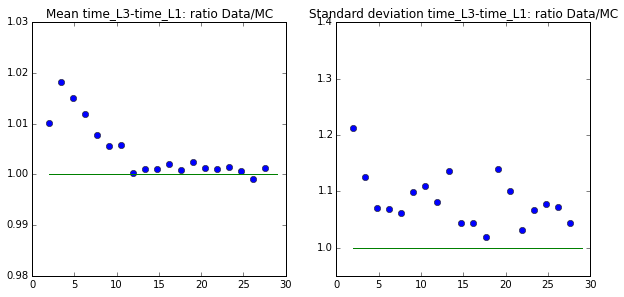

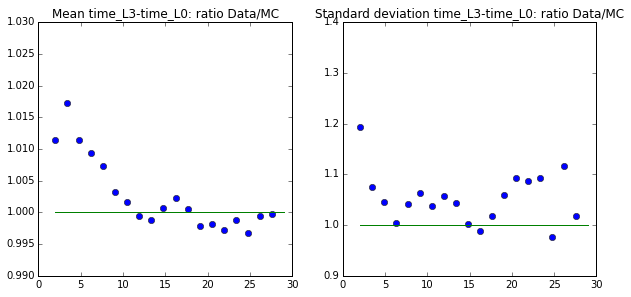

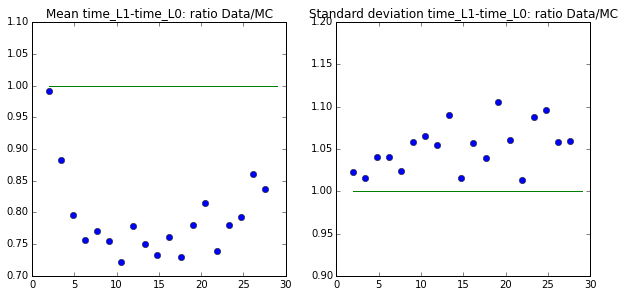

In [9]:
canvasMean={ 'time_L3-time_L0':(0.99,1.03),
             'time_L3-time_L2':(0.80,1.10),
             'time_L3-time_L1':(0.98,1.03),
             'time_L1-time_L0':(0.70,1.10),
             'betaH':          (0.98,1.01),
             'beta':           (0.98,1.01)}

canvasStd={ 'time_L3-time_L0':(0.90,1.40),
            'time_L3-time_L2':(0.90,1.20),
            'time_L3-time_L1':(0.95,1.40),
            'time_L1-time_L0':(0.90,1.20),
            'betaH':          (0.90,1.50),
            'beta':           (0.90,1.50)}


for var in variables:
    print var
    figure(figsize=(10,10))
    subplot(221)
    ratioMean=[x/y for x,y in zip(mean[var]['Data'],mean[var]['MC'])]

    plt.title('Mean '+ var + ': ratio Data/MC')
    plt.plot(rigBins[:-1],ratioMean,'o')
    plt.plot((rigBins[0],rigBins[-1]),(1,1))
    ylim(canvasMean[var])

    subplot(222)
    ratioStd=[x/y for x,y in zip(std[var]['Data'],std[var]['MC'])]
    plt.title('Standard deviation '+ var + ': ratio Data/MC')
    plt.plot(rigBins[:-1],ratioStd,'o')
    plt.plot((rigBins[0],rigBins[-1]),(1,1))
    ylim(canvasStd[var])



45.8366236105


[(3.8861674569502735,
  3.9073176405724284,
  3.9086345496104498,
  3.9086949448970643,
  3.9059534990796569,
  3.9076727045486201,
  3.918742209335492,
  3.9293054285016207,
  3.9257287240122567,
  3.9036340355327179,
  3.9170638371299553,
  3.9239614754261454,
  3.9088790104005255,
  3.9245103859374848,
  3.9182435622205651,
  3.9213182459475853,
  3.9169692196369601,
  3.90823821722089,
  3.9219209718235293)]

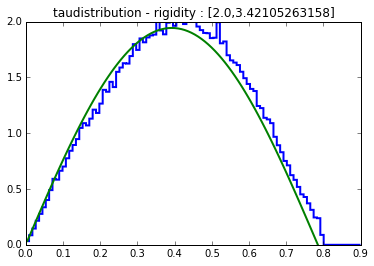

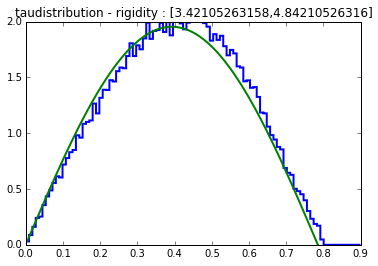

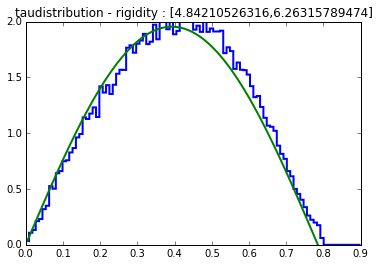

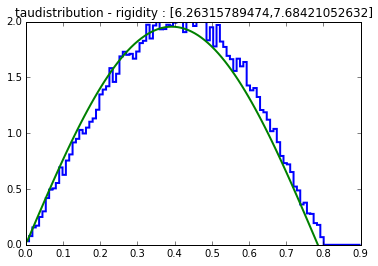

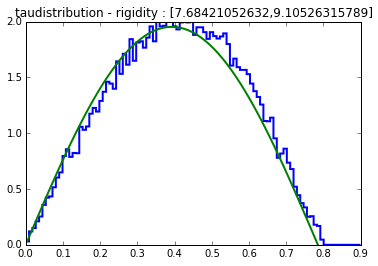

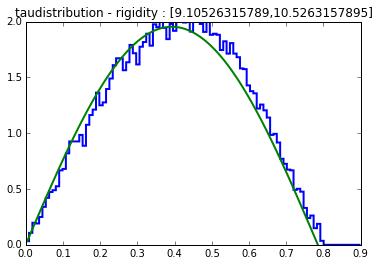

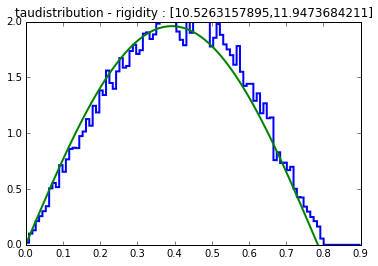

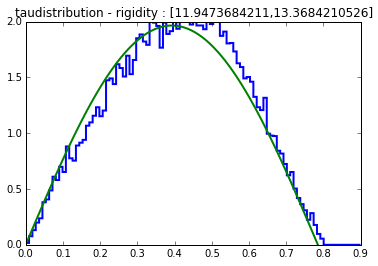

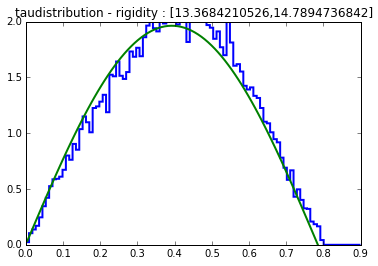

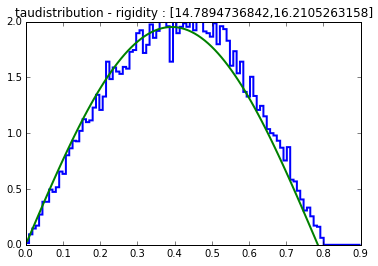

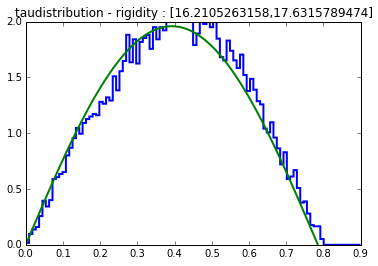

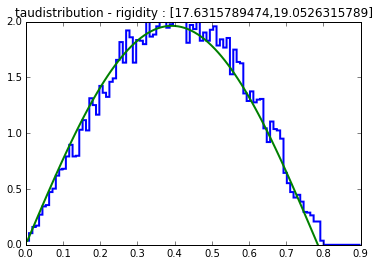

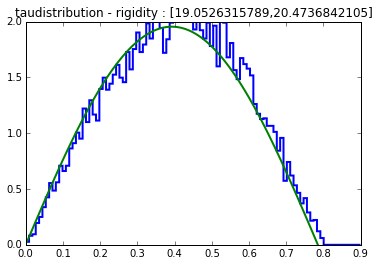

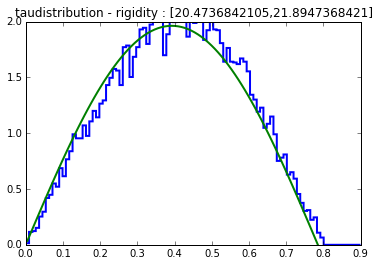

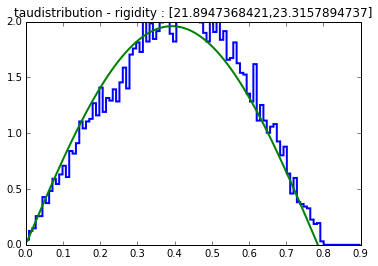

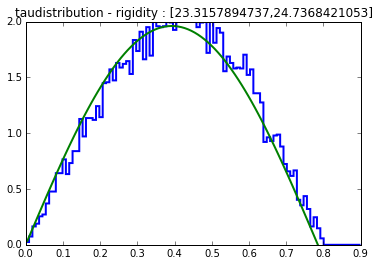

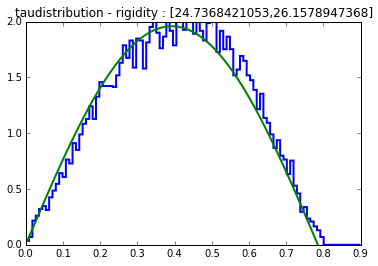

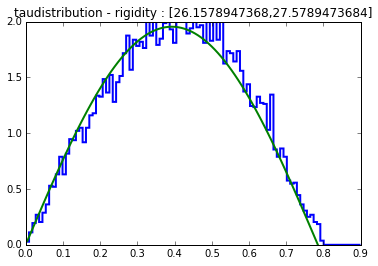

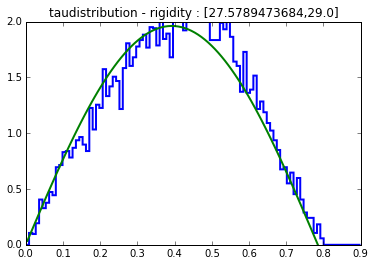

In [10]:
dfMC['tau']=((df['GenDir0'].pow(2)+df['GenDir1'].pow(2))/df['GenDir2'].pow(2)).apply(np.sqrt).apply(np.arctan)
variables['tau']=((2), (0, 0.9), (0,2))
funcCos2 = lambda par, x: par[0]*np.sin(2*x)*np.cos(2*x)
print 0.8/np.pi*180.
zip(* fitAllRigBin(dfMC,'tau',rigBins,*variables['tau'],funcFit=funcCos2))
#plt.hist(dfMC['tau'].values,normed=True,range=(0,0.9),bins=100,histtype='step',linewidth=2.0)